<a href="https://colab.research.google.com/github/Amitkrsocial/Amitkrsocial/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px #chloropleth
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load the data
data = pd.read_csv("/content/covid_19_clean_complete (18).csv")


In [ ]:
data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)


In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data['date'].value_counts()

2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: date, Length: 188, dtype: int64

In [ ]:
#To find all the cases on last value in date
top = data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
w = top.groupby('country')['confirmed',	'deaths'	,'recovered',	'active'].sum()
w = w.reset_index()
w

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
#choropleth - A choropleth map is a thematic map that is used to represent statistical data
#using the color mapping symbology technique.

fig=px.choropleth(w,locations='country',locationmode='country names',color='deaths',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

Text(0, 0.5, 'Cases total')

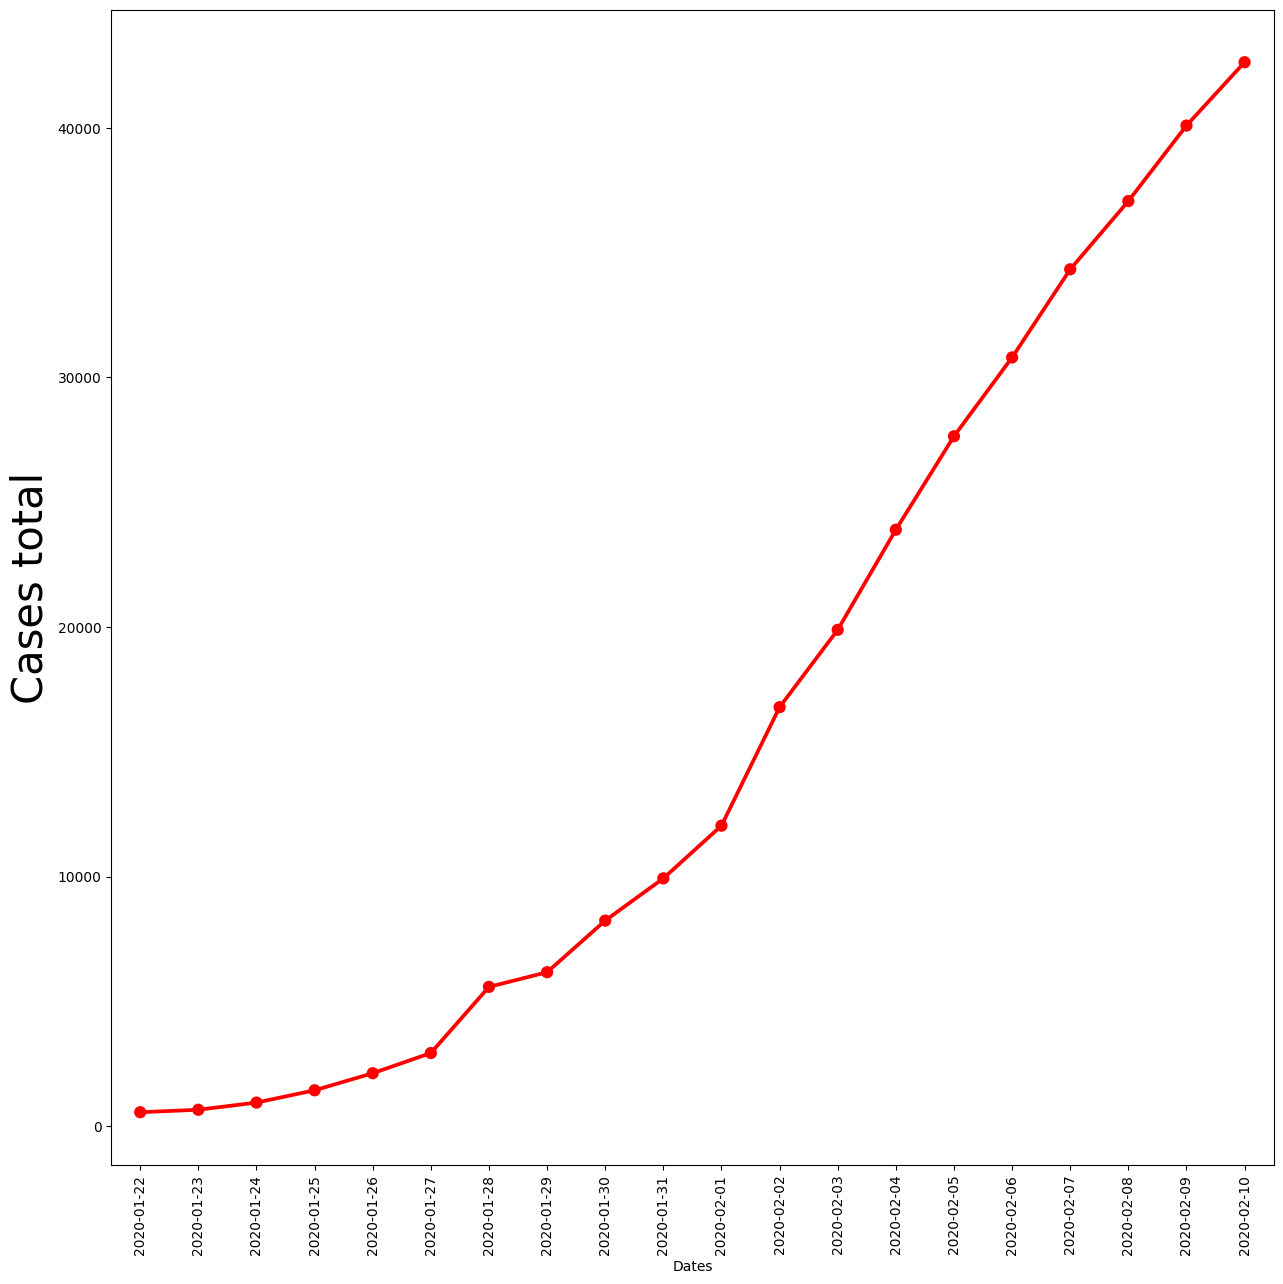

In [24]:
#plot for confirmed cases
plt.figure(figsize=(15,15))

t_cases = data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date'] = pd.to_datetime(t_cases['date'])

#point plot
sns.pointplot(x = t_cases['date'].dt.date.head(20), y=t_cases['confirmed'].head(20), color='r')

plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [25]:
#Fb Prophet


In [27]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from prophet import Prophet


In [29]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [30]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [31]:
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [32]:
confirmed.tail()


,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [33]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [34]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail() #last 5 rows

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [35]:
m = Prophet()
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbebaxkzt/anxmveva.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbebaxkzt/31g3_c5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25044', 'data', 'file=/tmp/tmpbebaxkzt/anxmveva.json', 'init=/tmp/tmpbebaxkzt/31g3_c5j.json', 'output', 'file=/tmp/tmpbebaxkzt/prophet_modelqdw0zz66/prophet_model-20230624165654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future = m.make_future_dataframe(periods=7, freq='D')
future.tail(12)

,ds
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01


In [37]:
forecast = m.predict(future)

In [38]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
183,2020-07-23,1.531592e+07,1.521894e+07,1.541849e+07
184,2020-07-24,1.553109e+07,1.542162e+07,1.562901e+07
185,2020-07-25,1.573870e+07,1.564410e+07,1.584690e+07
186,2020-07-26,1.593622e+07,1.582981e+07,1.604287e+07
187,2020-07-27,1.613084e+07,1.602652e+07,1.623027e+07
188,2020-07-28,1.632012e+07,1.621454e+07,1.642430e+07
189,2020-07-29,1.652993e+07,1.643283e+07,1.663787e+07
190,2020-07-30,1.674386e+07,1.664140e+07,1.685299e+07
191,2020-07-31,1.695903e+07,1.685402e+07,1.705807e+07
192,2020-08-01,1.716665e+07,1.706265e+07,1.727091e+07


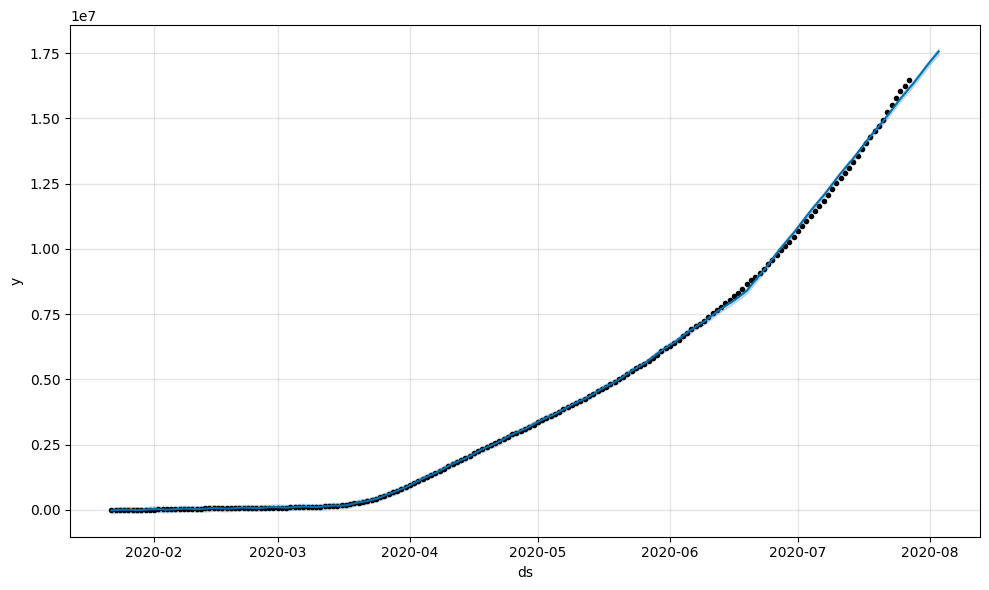

In [39]:
confirmed_cases_forecast = m.plot(forecast)

In [40]:
forecast['yhat'] = forecast['yhat'].astype(int)


In [41]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
183,2020-07-23,15315917
184,2020-07-24,15531087
185,2020-07-25,15738704
186,2020-07-26,15936220
187,2020-07-27,16130844
188,2020-07-28,16320122
189,2020-07-29,16529927
190,2020-07-30,16743859
191,2020-07-31,16959029
192,2020-08-01,17166646




# Forecast on Death cases



In [42]:
deaths.head()


,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [43]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail() #last 5 rows

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [45]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [46]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [47]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbebaxkzt/x69fwpkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbebaxkzt/iiv92yzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=870', 'data', 'file=/tmp/tmpbebaxkzt/x69fwpkj.json', 'init=/tmp/tmpbebaxkzt/iiv92yzz.json', 'output', 'file=/tmp/tmpbebaxkzt/prophet_modelzfzi9_yb/prophet_model-20230624171758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,733933.338346,724273.377694,743455.244128
205,2020-08-14,739449.842781,728475.460787,749245.483142
206,2020-08-15,744332.798091,732366.993783,755133.341708
207,2020-08-16,748470.052031,735185.856500,760763.559534
208,2020-08-17,752761.087217,738993.565554,765694.940115


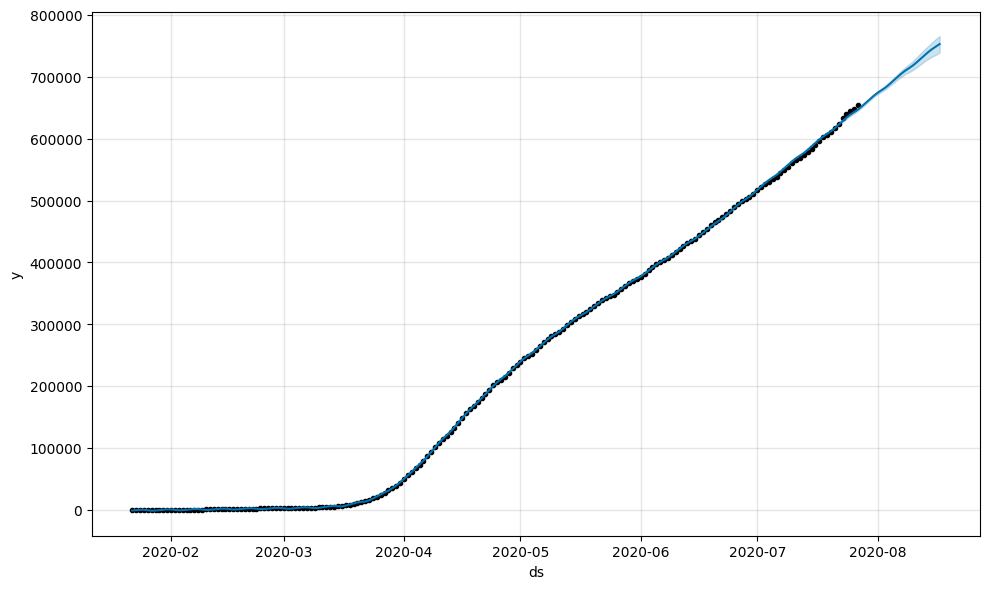

In [49]:
deaths_forecast_plot = m.plot(forecast)

In [50]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,633812
185,2020-07-25,638695
186,2020-07-26,642832
187,2020-07-27,647123
188,2020-07-28,652331
189,2020-07-29,657897
190,2020-07-30,663508
191,2020-07-31,669024
192,2020-08-01,673907
193,2020-08-02,678044
